In [2]:
# Load in all dependencies and helper functions from the main folder
import sys
sys.path.append('..//')
from utils import *

Using TensorFlow backend.


GPU availbility: ['/job:localhost/replica:0/task:0/device:GPU:0']


In [3]:
df = pd.read_csv(MST_PATH + 'all_img_facial_lankmarks.csv')
df.shape

(642719, 153)

In [4]:
eye_idx = [int(p) for p in os.listdir(STITCH_EYE_PATH)]
eye_path = [STITCH_EYE_PATH + p for p in os.listdir(STITCH_EYE_PATH)]
eye_path[:5]

['D:\\david_xu_thesis\\0_data_lan\\datasets\\mst\\stitched_eyes\\0',
 'D:\\david_xu_thesis\\0_data_lan\\datasets\\mst\\stitched_eyes\\1',
 'D:\\david_xu_thesis\\0_data_lan\\datasets\\mst\\stitched_eyes\\10',
 'D:\\david_xu_thesis\\0_data_lan\\datasets\\mst\\stitched_eyes\\100',
 'D:\\david_xu_thesis\\0_data_lan\\datasets\\mst\\stitched_eyes\\1000']

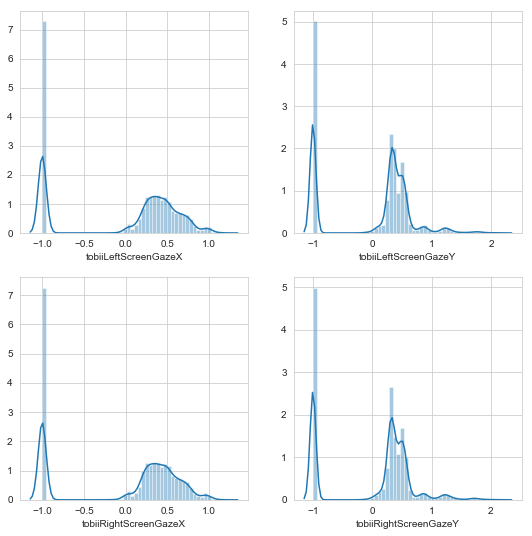

In [5]:
f, axes = plt.subplots(2, 2, figsize=(9, 9))
sns.distplot(df['tobiiLeftScreenGazeX'], ax = axes[0, 0])
sns.distplot(df['tobiiLeftScreenGazeY'], ax = axes[0, 1])
sns.distplot(df['tobiiRightScreenGazeX'], ax = axes[1, 0])
sns.distplot(df['tobiiRightScreenGazeY'], ax = axes[1, 1])

In [6]:
print("Perc. of right empty:", len(df[(df['tobiiRightScreenGazeX'] == -1) & (df['tobiiRightScreenGazeY'] == -1)])/len(df))
print("Perc. of left empty:", len(df[(df['tobiiLeftScreenGazeX'] == -1) & (df['tobiiLeftScreenGazeY'] == -1)])/len(df))
print("Perc. of right empty, left not empty:", len(df[(df['tobiiLeftScreenGazeX'] != -1) & (df['tobiiRightScreenGazeX'] == -1)])/len(df))
print("Perc. of left empty, right not empty:", len(df[(df['tobiiLeftScreenGazeX'] == -1) & (df['tobiiRightScreenGazeX'] != -1)])/len(df))

Perc. of right empty: 0.3184206472813158
Perc. of left empty: 0.3207078054328564
Perc. of right empty, left not empty: 0.08685444183227818
Perc. of left empty, right not empty: 0.08914159998381875


Now we calculate the undergroud truth using the following rule:
- If both left and right coordinates exist, use the average
- If only one exists, use that one
- If none exists, return nan. These observations will be dropped

In [7]:
res = defaultdict(list)

for idx in eye_idx:
    res['id'].append(df.loc[idx, 'id'])
    X,Y = get_groud_truth(df, idx)
    res['coord_x'].append(X)
    res['coord_y'].append(Y)

res = pd.DataFrame(res)
res['path'] = eye_path
print("res.shape", res.shape)
res.head()

c:\program files\python36\lib\site-packages\numpy\core\fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
c:\program files\python36\lib\site-packages\numpy\core\_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


res.shape (642719, 4)


,id,coord_x,coord_y,path
0,P_01_||_1491423217564_18_-study-benefits_of_ru...,0.182232,0.355385,D:\david_xu_thesis\0_data_lan\datasets\mst\sti...
1,P_01_||_1491423217564_18_-study-benefits_of_ru...,0.173634,0.337346,D:\david_xu_thesis\0_data_lan\datasets\mst\sti...
2,P_01_||_1491423217564_18_-study-benefits_of_ru...,0.143065,0.058212,D:\david_xu_thesis\0_data_lan\datasets\mst\sti...
3,P_01_||_1491423217564_18_-study-benefits_of_ru...,0.514188,1.188880,D:\david_xu_thesis\0_data_lan\datasets\mst\sti...
4,P_01_||_1491423217564_18_-study-benefits_of_ru...,0.501988,0.530128,D:\david_xu_thesis\0_data_lan\datasets\mst\sti...


In [8]:
# # Use image gradient to approx. image sharpness
# sharp_list = []
# for p in res['path']:
#     img = Image.open(p).convert('L')
#     array = np.asarray(img, dtype = np.int32)
#     gy, gx = np.gradient(array)
#     gnorm = np.sqrt(gx**2, gy**2)
#     sharp = np.average(gnorm)
#     sharp_list.append(sharp)
# res['sharpness'] = sharp_list
# res.shape

In [9]:
# sns.distplot(res['sharpness'])

In [10]:
# Drop missing values
# (642719, 5)
# (493887, 5)
print(res.shape)
res = res.dropna(subset = ['coord_x', 'coord_y'])
res.index = range(len(res))
print(res.shape)

(642719, 4)
(493887, 4)


In [11]:
res.to_csv(MST_PATH + 'mst_eye_label.csv', index = None)